<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.testutils import assert_array_equal

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if len(X) == 0 or len(V) == 0:
        return np.array([])
    
    total = np.zeros_like(V[0], dtype=np.float64)
    
    for mat, vec in zip(X, V):
        total += np.dot(mat, vec)
    
    return total

def test_sum_prod():
    mat1 = np.array([[1, 2], [3, 4]])
    mat2 = np.array([[5, 6], [7, 8]])
    vec1 = np.array([[1], [2]])
    vec2 = np.array([[3], [4]])
    mat3 = np.array([[0.5, 1.5], [2.0, 0.25]])
    vec3 = np.array([[1.0], [2.0]])
    
    assert_array_equal(sum_prod([], []), np.array([]))
    
    assert_array_equal(sum_prod([mat1], [vec1]), np.array([[5], [11]]))
    
    expected = np.array([[44], [64]])
    assert_array_equal(sum_prod([mat1, mat2], [vec1, vec2]), expected)
    
    assert_array_equal(sum_prod([mat3], [vec3]), np.array([[3.5], [2.5]]))
    
    assert_array_equal(sum_prod([np.eye(2)], [vec1]), vec1)
    
    assert_array_equal(sum_prod([np.zeros((2, 2))], [vec1]), np.zeros((2,1)))
    
    print("Все тесты успешно пройдены")

test_sum_prod()

Все тесты успешно пройдены


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [12]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    mat1 = np.array([[0.5, 1.5], [2.5, 0.5]])
    assert_array_equal(binarize(mat1, 1.0), np.array([[0, 1], [1, 0]]))
    
    mat2 = np.array([[0.99, 1.00, 1.01]])
    assert_array_equal(binarize(mat2, 1.0), np.array([[0, 0, 1]]))
    
    mat3 = np.array([[0.1, 0.2, 0.3]])
    assert_array_equal(binarize(mat3, 1.0), np.array([[0, 0, 0]]))
    
    mat4 = np.array([[2, 3, 4]])
    assert_array_equal(binarize(mat4, 1.0), np.array([[1, 1, 1]]))
    
    mat5 = np.array([[-2, -1, 0], [1, 2, 3]])
    assert_array_equal(binarize(mat5, 0.0), np.array([[0, 0, 0], [1, 1, 1]]))
    
    print("Все тесты пройдены")
    
test_binarize()

Все тесты пройдены


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [13]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

def test_unique_elements():
    mat = np.array([
        [1, 2, 1],
        [3, 3, 3],
        [1, 5, 6]
    ])
    
    row_unique = unique_rows(mat)
    assert_array_equal(row_unique[0], [1, 2])
    assert_array_equal(row_unique[1], [3])
    assert_array_equal(row_unique[2], [1, 5, 6])
    
    col_unique = unique_columns(mat)
    assert_array_equal(col_unique[0], [1, 3])
    assert_array_equal(col_unique[1], [2, 3, 5])
    assert_array_equal(col_unique[2], [1, 3, 6])
    
    empty = np.array([]).reshape(0, 0)
    assert unique_rows(empty) == []
    assert unique_columns(empty) == []
    
    print("Все тесты успешно пройдены")
    
test_unique_elements()

Все тесты успешно пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

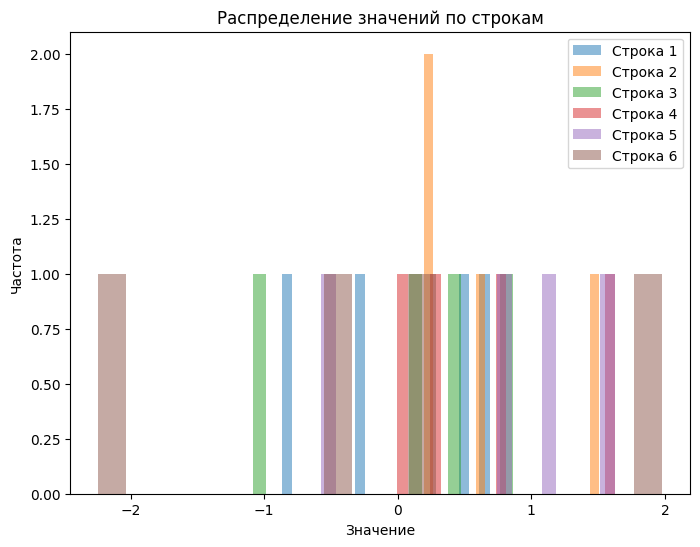

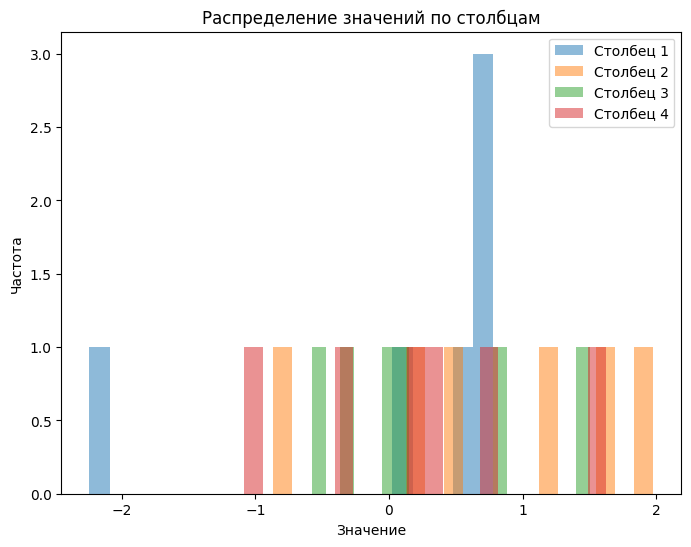

[[ 0.48256086 -0.86647199 -0.31124417  0.68829692]
 [ 0.63735945  0.19549324  1.50730706  0.25817607]
 [ 0.11031373  0.43796071  0.86577098 -1.08202918]
 [ 0.74061699  1.62939292 -0.00227312  0.27988247]
 [ 0.78197651  1.14428978 -0.57583476  1.62705176]
 [-2.2419629   1.97687534  0.0811097  -0.38891294]]
[0.0851441  0.75292333 0.26080595 0.23041085]
[1.13236042 0.90863268 0.50807634 0.71159077]
[-0.0017146   0.64958395  0.08300406  0.66190481  0.74437082 -0.1432227 ]
[0.38856312 0.27380922 0.52419164 0.38232556 0.67085444 2.25255372]


In [30]:
def generate_normal_matrix(m, n, mu=0, sigma=1):
    return np.random.normal(loc=mu, scale=sigma, size=(m, n))

def calculate_row_stats(mat):
    return np.mean(mat, axis=0), np.var(mat, axis=0)

def calculate_col_stats(mat):
    return np.mean(mat, axis=1), np.var(mat, axis=1)

def plot_row_histogram(mat, max_rows=10):
    plt.figure(figsize=(8, 6))
    for i in range(min(mat.shape[0], max_rows)):
        plt.hist(mat[i, :], alpha=0.5, bins=20, label=f'Строка {i+1}')
    plt.title('Распределение значений по строкам')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

def plot_col_histogram(mat, max_cols=10):
    plt.figure(figsize=(8, 6))
    for i in range(min(mat.shape[1], max_cols)):
        plt.hist(mat[:, i], alpha=0.5, bins=20, label=f'Столбец {i+1}')
    plt.title('Распределение значений по столбцам')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()
    
def analyze(m, n, mu=0, sigma=1):
    mat = generate_normal_matrix(m, n, mu, sigma)
    
    row_means, row_vars = calculate_row_stats(mat)
    col_means, col_vars = calculate_col_stats(mat)
    
    plot_row_histogram(mat)
    plot_col_histogram(mat)
    
    return {
        'matrix': mat,
        'row_means': row_means,
        'row_variances': row_vars,
        'column_means': col_means,
        'column_variances': col_vars
    }

result = analyze(6, 4)

print(result['matrix'])
print(result['row_means'])
print(result['row_variances'])
print(result['column_means'])
print(result['column_variances'])

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
def chess(m, n, a, b):
    mat = np.empty((m, n), dtype=type(a))
    
    mat[::2, ::2] = a
    mat[::2, 1::2] = b
    mat[1::2, ::2] = b
    mat[1::2, 1::2] = a
    
    return mat

def test_chess():
    expected1 = np.array([[0, 1],
                          [1, 0]])
    assert_array_equal(chess(2, 2, 0, 1), expected1)
    
    expected2 = np.array([[0, 1, 0],
                          [1, 0, 1],
                          [0, 1, 0]])
    assert_array_equal(chess(3, 3, 0, 1), expected2)
    
    expected3 = np.array([[0, 1, 0],
                          [1, 0, 1]])
    assert_array_equal(chess(2, 3, 0, 1), expected3)
    
    expected4 = np.array([[0, 1],
                          [1, 0],
                          [0, 1]])
    assert_array_equal(chess(3, 2, 0, 1), expected4)
    
    expected5 = np.array([[0.5, 0.8],
                          [0.8, 0.5]])
    assert_array_equal(chess(2, 2, 0.5, 0.8), expected5)
    
    print("Все тесты пройдены успешно")
    
test_chess()

Все тесты пройдены успешно


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

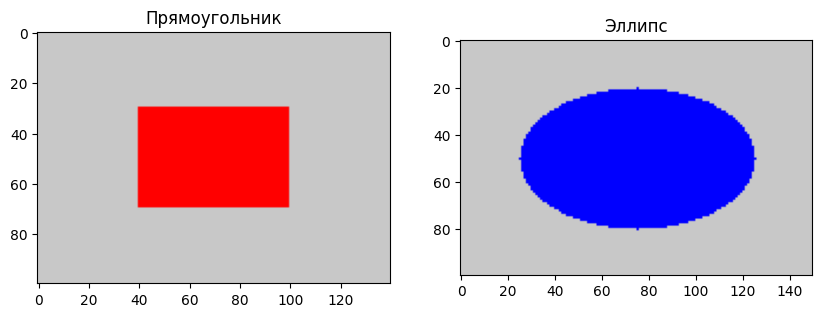

Все тесты пройдены успешно


In [21]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color
    
    cx, cy = n//2, m//2
    
    x_start = max(0, cx - a // 2)
    x_end = min(n, cx + a // 2 + a % 2)
    y_start = max(0, cy - b // 2)
    y_end = min(m, cy + b // 2 + b % 2)
    
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image
    
def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color
    
    y, x = np.ogrid[:m, :n]
    cx, cy = n//2, m//2
    
    mask = ((x - cx)**2 / a**2 + (y- cy)**2 / b**2) <=1
    
    image[mask] = ellipse_color
        
    return image

def test_draw_func():
    rect_img = draw_rectangle(50, 30, 100, 100, (255, 0, 0), (0, 0, 0))
    assert rect_img.shape == (100, 100, 3)
    assert_array_equal(rect_img[0, 0], [0, 0, 0])
    assert_array_equal(rect_img[50, 50], [255, 0, 0])
    
    ellipse_img = draw_ellipse(40, 20, 100, 100, (0, 255, 0), (255, 255, 255))
    assert ellipse_img.shape == (100, 100, 3)
    assert_array_equal(ellipse_img[0, 0], [255, 255, 255])
    assert_array_equal(ellipse_img[50, 50], [0, 255, 0])
    
    print("Все тесты пройдены успешно")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(draw_rectangle(60, 40, 100, 140, (255, 0, 0), (200, 200, 200)))
plt.title("Прямоугольник")

plt.subplot(1, 2, 2)
plt.imshow(draw_ellipse(50, 30, 100, 150, (0, 0, 255), (200, 200, 200)))
plt.title("Эллипс")

plt.show()

test_draw_func()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [17]:
def analyze_time_series(series, window_size):
    series = np.array(series)
    result = {}
    
    result['mean'] = np.mean(series)
    result['variance'] = np.var(series)
    result['std'] = np.std(series)
    
    local_max = []
    local_min = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            local_max.append(i)
        elif series[i] < series[i - 1] and series[i] < series[i + 1]:
            local_min.append(i)
    
    result['local_max'] = local_max
    result['local_min'] = local_min
    
    moving_avg = []
    
    for i in range(len(series) - window_size + 1):
        window = series[i:i + window_size]
        moving_avg.append(np.mean(window))
    
    result['moving_avg'] = moving_avg
    
    return result

def test_analyze_time_series():
    
    test_series = [1, 2, 3, 4, 5]
    result = analyze_time_series(test_series, 3)
    assert result['mean'] == 3
    assert result['variance'] == 2
    assert result['std'] == np.sqrt(2)
    assert result['moving_avg'] == [2, 3, 4]
    
    test_series = [1, 3, 2, 4, 1, 5, 0]
    result = analyze_time_series(test_series, 3)
    assert result['local_max'] == [1, 3, 5]
    assert result['local_min'] == [2, 4]
    
    print("Все тесты пройдены успешно")
    
test_analyze_time_series()

Все тесты пройдены успешно


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [18]:
def one_hot_encoding(v):
    lab = np.array(v)
    num_classes = np.max(lab) + 1
    return np.eye(num_classes, dtype=int)[v]

def test_one_hot_encoding():
    lab1 = [0, 2, 3, 0]
    expected1 = np.array([[1, 0, 0, 0],
                        [0, 0, 1, 0],
                        [0, 0, 0, 1],
                        [1, 0, 0, 0]])
    assert_array_equal(one_hot_encoding(lab1), expected1)
    
    lab2 = [1, 3, 2]
    expected2 = np.array([[0, 1, 0, 0],
                          [0, 0, 0, 1],
                          [0, 0, 1, 0]])
    assert_array_equal(one_hot_encoding(lab2), expected2)
    
    lab3 = [0, 0, 0]
    expected3 = np.array([[1],
                          [1],
                          [1]])
    assert_array_equal(one_hot_encoding(lab3), expected3)
    
    print("Все тесты пройдены успешно")
    
test_one_hot_encoding()

Все тесты пройдены успешно
